<a href="https://colab.research.google.com/github/Swetha-Anaparthi/Chennai_House_Price_Prediction/blob/main/chennai_house_price_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
data=pd.read_csv(r"/content/train-chennai-sale (1).csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Data Cleaning**

In [ ]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
data[data["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [ ]:
data[data["N_BATHROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [ ]:
# Filling null values
qs_mean=data["QS_OVERALL"].mean()
data["QS_OVERALL"].fillna(qs_mean,inplace=True)
data["N_BEDROOM"].fillna(int(data["N_BEDROOM"].mode()),inplace=True)
data["N_BATHROOM"].fillna(int(data["N_BATHROOM"].mode()),inplace=True)

In [ ]:
data.isnull().sum()
  

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
# Changing the datatype of the features
data[["N_BEDROOM"]]=data[["N_BEDROOM"]].astype(np.int64)
data[["N_BATHROOM"]]=data[["N_BATHROOM"]].astype(np.int64)

In [ ]:
#Finding all categorical features
cat_feature=[x  for x in data.columns
                if not (data[x].dtype== np.int64 or data[x].dtype==np.float64)]
print(cat_feature)

['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:
#Finding all the numerical features 
num_feature=[x  for x in data.columns
                if  (data[x].dtype== np.int64 or data[x].dtype==np.float64)]
print(num_feature)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE']


In [ ]:
# Dropping unwanted features
data=data.drop(["PRT_ID",'REG_FEE','COMMIS'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int64  
 5   N_BATHROOM     7109 non-null   int64  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [ ]:
data.duplicated().sum()

0

Cleaning categorical features

Correcting spelling mistakes

In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data["AREA"]=data["AREA"].replace({"Karapakam":'Karapakkam',"Ana Nagar":"Anna Nagar",
                                   "Ann Nagar":"Anna Nagar",'Adyr':'Adyar',"Velchery":"Velachery",'Chrompt':'Chrompet','Chrmpet':'Chrompet','KKNagar':'KK Nagar','TNagar':'T Nagar',"Chormpet":"Chrompet"})
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data["SALE_COND"]=data["SALE_COND"].replace({"Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial","AdjLand":"Adj Land"})
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data["BUILDTYPE"]=data["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"})
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data["PARK_FACIL"]=data["PARK_FACIL"].replace({"Yes":1,"No":0,"Noo":0})
data["PARK_FACIL"].unique()

array([1, 0])

In [ ]:
data['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].replace({"AllPub":"All_Pub","All Pub":"All_Pub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"})
data["UTILITY_AVAIL"].unique()

array(['All_Pub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data["STREET"]=data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"})
data["STREET"].unique()
    


array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Converting year_month features to date and time

In [ ]:
from  datetime import datetime,date
data["CONSTRUCTION_DATE"]=pd.to_datetime(data["DATE_BUILD"],format="%d-%m-%Y")
data["CONSTRUCTION_YEAR"]=pd.DatetimeIndex(data["CONSTRUCTION_DATE"]).year
data["SALE_DATE"]=pd.to_datetime(data["DATE_SALE"],format="%d-%m-%Y")
data["SALE_YEAR"]=pd.DatetimeIndex(data["SALE_DATE"]).year

In [ ]:
data["AGE"]=data["SALE_YEAR"]-data["CONSTRUCTION_YEAR"]

In [ ]:
data=data.drop(["DATE_BUILD","DATE_SALE","SALE_DATE","CONSTRUCTION_DATE"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               7109 non-null   object 
 1   INT_SQFT           7109 non-null   int64  
 2   DIST_MAINROAD      7109 non-null   int64  
 3   N_BEDROOM          7109 non-null   int64  
 4   N_BATHROOM         7109 non-null   int64  
 5   N_ROOM             7109 non-null   int64  
 6   SALE_COND          7109 non-null   object 
 7   PARK_FACIL         7109 non-null   int64  
 8   BUILDTYPE          7109 non-null   object 
 9   UTILITY_AVAIL      7109 non-null   object 
 10  STREET             7109 non-null   object 
 11  MZZONE             7109 non-null   object 
 12  QS_ROOMS           7109 non-null   float64
 13  QS_BATHROOM        7109 non-null   float64
 14  QS_BEDROOM         7109 non-null   float64
 15  QS_OVERALL         7109 non-null   float64
 16  SALES_PRICE        7109 


**Finding Outliers**

In [ ]:
print("Max sqft",data["INT_SQFT"].max())
print("Min sqft",data["INT_SQFT"].min())

Max sqft 2500
Min sqft 500


In [ ]:
print("Max DIST_MAINROAD",data["DIST_MAINROAD"].max())
print("Min DIST_MAINROAD",data["DIST_MAINROAD"].min())

Max DIST_MAINROAD 200
Min DIST_MAINROAD 0


In [ ]:
data["N_BEDROOM"].unique()

array([1, 2, 3, 4])

In [ ]:
data["N_BATHROOM"].unique()

array([1, 2])

In [ ]:
data["N_ROOM"].unique()

array([3, 5, 4, 2, 6])

In [ ]:
print("Max SALES_PRICE ",data["SALES_PRICE"].max())
print("Min SALES_PRICE ",data["SALES_PRICE"].min())

Max SALES_PRICE  23667340
Min SALES_PRICE  2156875


No Outliers

**Finding the relation between the features and target variables**

Numerical Features

Feature:INT_SQFT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


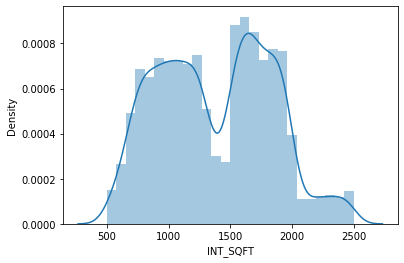

In [ ]:
sns.distplot(data['INT_SQFT'])

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


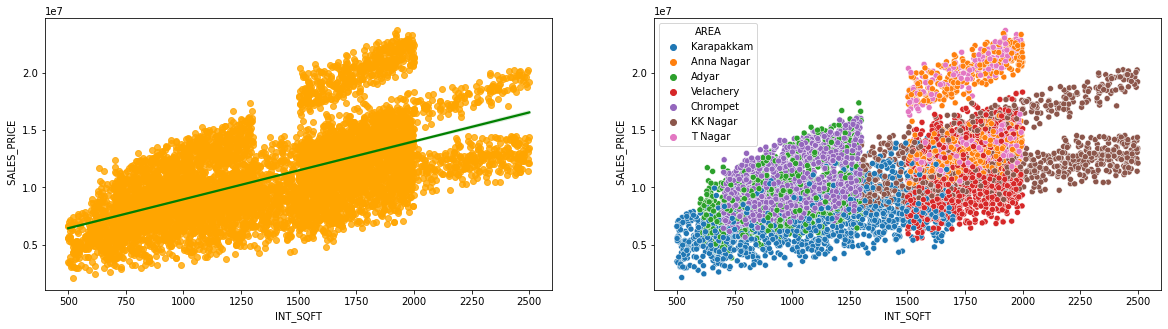

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x="INT_SQFT",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("INT_SQFT")
plt.ylabel(" SALES_PRICE")
#data[["INT_SQFT","SALES_PRICE"]].corr()
plt.subplot(122)
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",hue="AREA",data=data)
plt.xlabel("INT_SQFT")
plt.ylabel(" SALES_PRICE")
data[["INT_SQFT","SALES_PRICE"]].corr()

IMPORTANT FEATURE,NO ENCODING REQUIRED

Karapakkam:INT_SQFT range(500 sqft-1750 sqft),  Price range(low-medium)

Anna Nagar:INT_SQFT range(1500 sqft-2000 sqft),  Price range:(medium-high)

Adyar:INT_SQFT range(600 sqft-1250 sqft), Price range(low-medium)

Velachery:INT_SQFT range(500 sqft-1750 sqft) ,Price range(medium)

Chorempet:INT_SQFT range(750 sqft-1250 sqft), Price range(low-medium)

KK Nagar:INT_SQFT range(1250 sqft-2500 sqft), Price range(medium-high)

T Nagar:INT_SQFT range(1500 sqft- 2000 sqft), Price range(medium-high)

Feature:DIST_MAINROAD

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


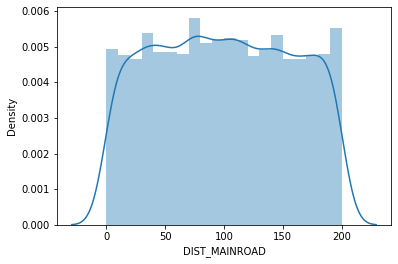

In [ ]:
sns.distplot(data['DIST_MAINROAD'])

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


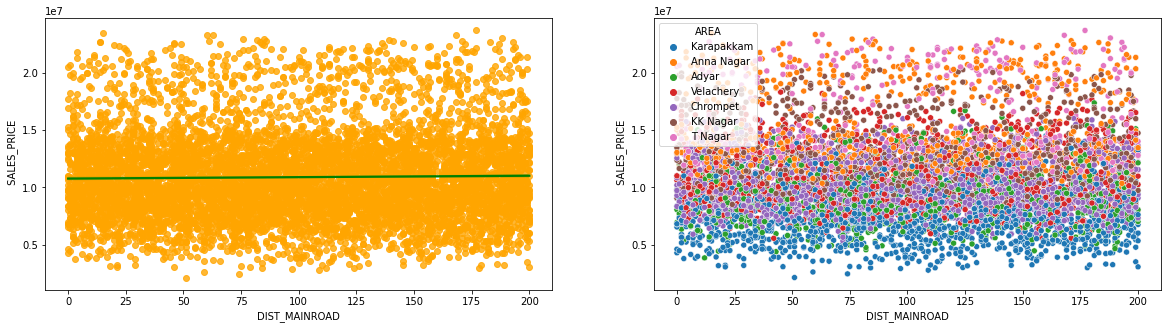

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x="DIST_MAINROAD",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("DIST_MAINROAD")
plt.ylabel(" SALES_PRICE")
plt.subplot(122)
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE",hue="AREA",data=data)
plt.xlabel("DIST_MAINROAD")
plt.ylabel(" SALES_PRICE")
data[["DIST_MAINROAD","SALES_PRICE"]].corr()

For change in input ---> No significant change in output ---> Discard DIST_MAINROAD.

In [ ]:

data=data.drop("DIST_MAINROAD",axis=1)

Feature:N_BEDROOM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


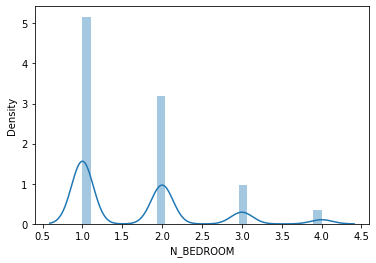

In [ ]:
sns.distplot(data["N_BEDROOM"])

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


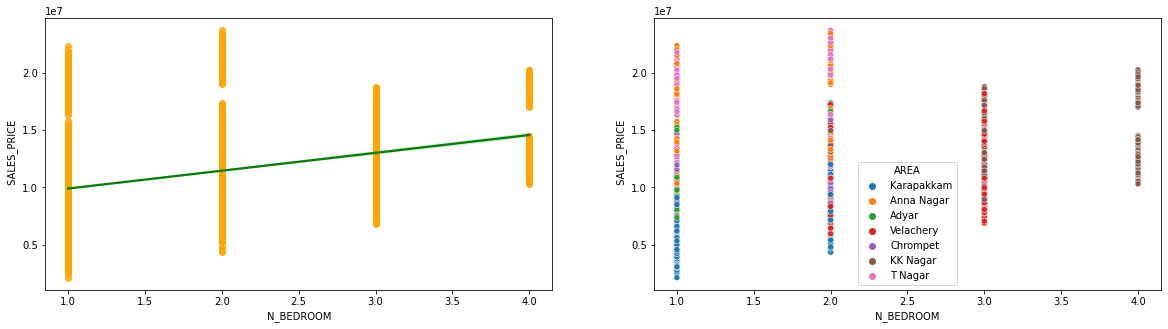

In [ ]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x="N_BEDROOM",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("N_BEDROOM")
plt.ylabel(" SALES_PRICE")
plt.subplot(122)
sns.scatterplot(x="N_BEDROOM",y="SALES_PRICE",hue="AREA",data=data)
plt.xlabel("N_BEDROOM")
plt.ylabel(" SALES_PRICE")
data[["N_BEDROOM","SALES_PRICE"]].corr()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

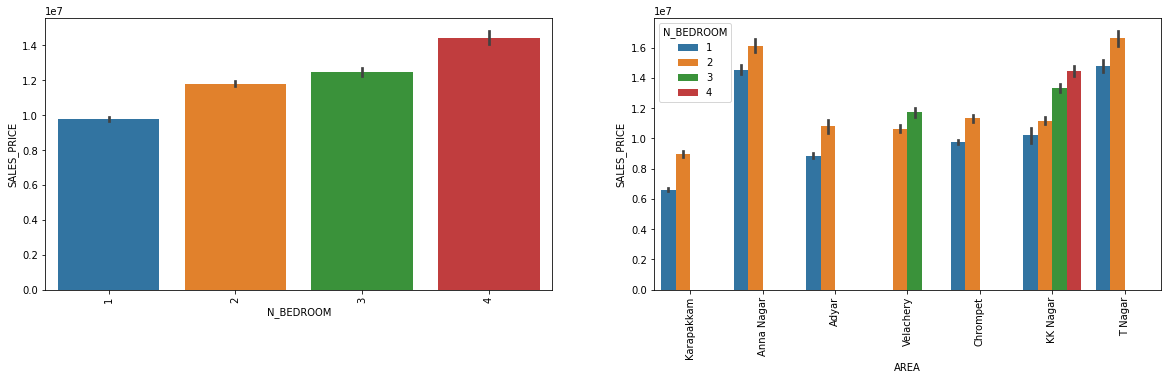

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x=data["N_BEDROOM"],y=data["SALES_PRICE"],order=data.groupby(by="N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])
plt.xticks(rotation="vertical")
plt.subplot(122)
sns.barplot(x="AREA",y="SALES_PRICE",hue="N_BEDROOM",data=data)
plt.xticks(rotation="vertical")

IMPORTANT FEATURE, NO ENCODING REQUIRED

In all the areas except KK Nagar and Valachery 2 Bedroom houses are of more demand followed by single bedroom

Feature:N_BATHROOM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


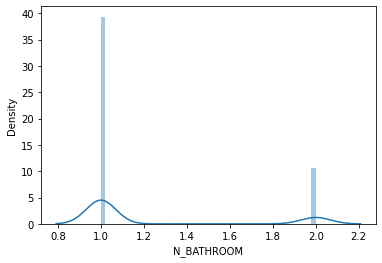

In [ ]:
sns.distplot(data["N_BATHROOM"])

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


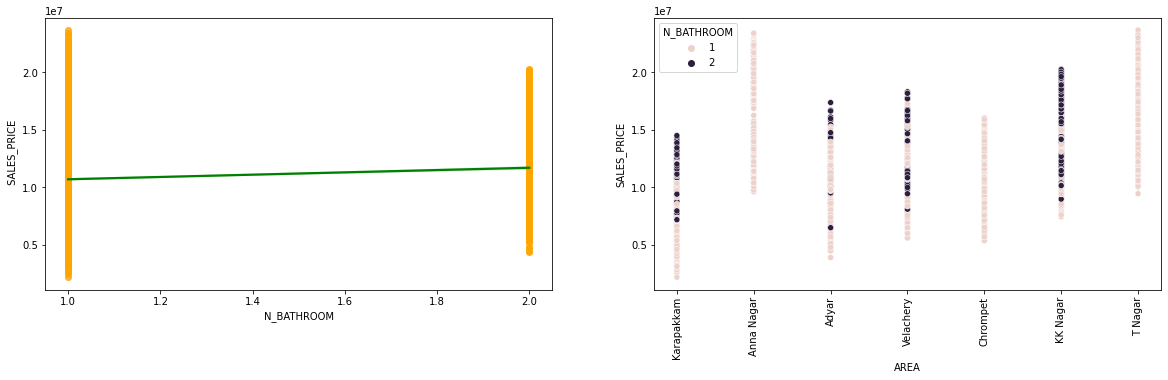

In [ ]:

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x="N_BATHROOM",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("N_BATHROOM")
plt.ylabel(" SALES_PRICE")
plt.subplot(122)
sns.scatterplot(x="AREA",y="SALES_PRICE",hue="N_BATHROOM",data=data)
plt.xticks(rotation="vertical")
data[["N_BATHROOM","SALES_PRICE"]].corr()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

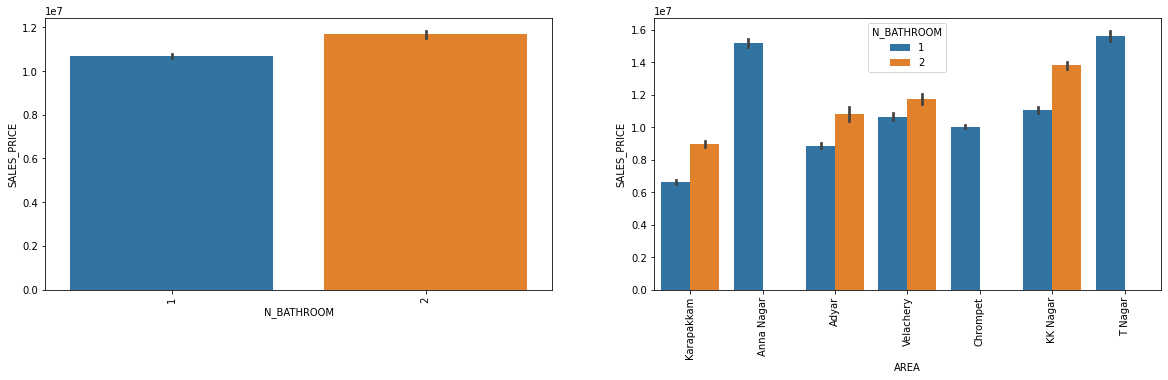

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x=data["N_BATHROOM"],y=data["SALES_PRICE"],order=data.groupby(by="N_BATHROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BATHROOM"])
plt.xticks(rotation="vertical")
plt.subplot(122)
sns.barplot(x="AREA",y="SALES_PRICE",hue="N_BATHROOM",data=data)
plt.xticks(rotation="vertical")


IMPORTANT FEATURE NO ENCODING REQUIRED

Except in Anna Nagar and T Nagar 2 BathRoom houses are of more demand.

Feature:N_ROOM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


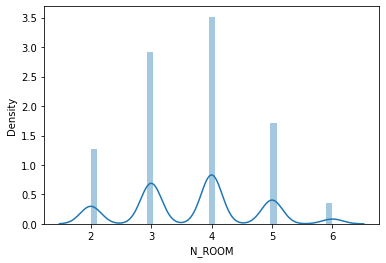

In [ ]:
sns.distplot(data["N_ROOM"])

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


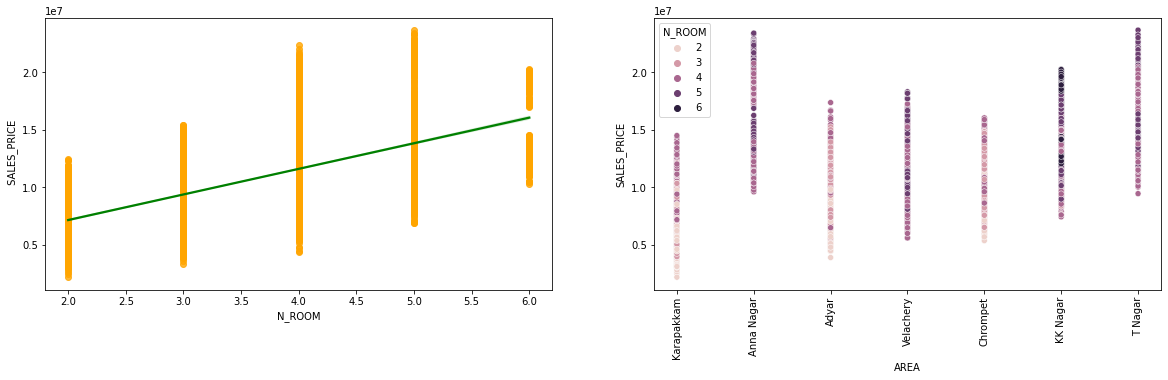

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x="N_ROOM",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("N_ROOM")
plt.ylabel(" SALES_PRICE")
plt.subplot(122)
sns.scatterplot(x="AREA",y="SALES_PRICE",hue="N_ROOM",data=data)
plt.xticks(rotation="vertical")

data[["N_ROOM","SALES_PRICE"]].corr()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

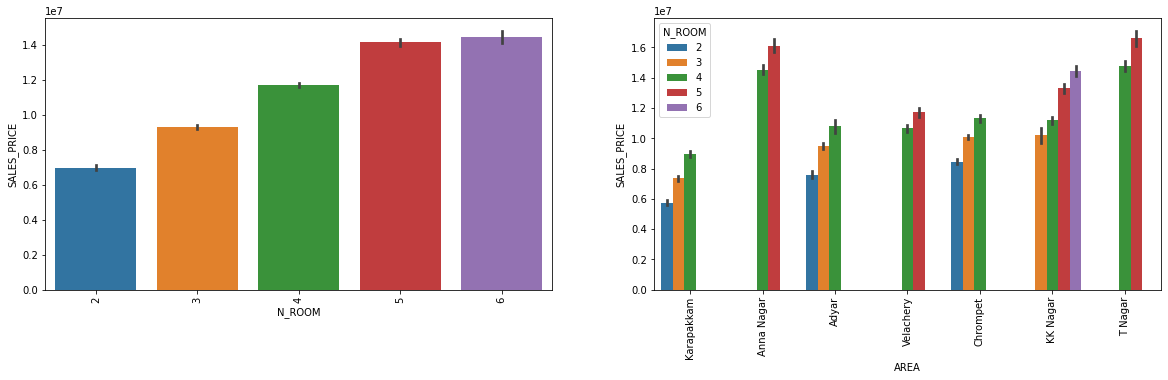

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x=data["N_ROOM"],y=data["SALES_PRICE"],order=data.groupby(by="N_ROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_ROOM"])
plt.xticks(rotation="vertical")
plt.subplot(122)
sns.barplot(x="AREA",y="SALES_PRICE",hue="N_ROOM",data=data)
plt.xticks(rotation="vertical")

IMPORTANT FEATURE NO ENCODING REQUIRED

In all the areas 4 room house has demand followed by 5,3 room house.

Feature:QS_ROOMS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


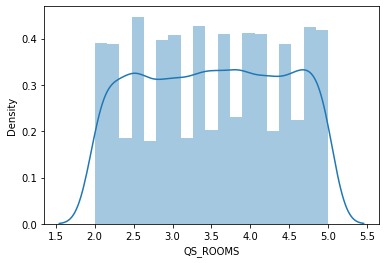

In [ ]:
sns.distplot(data["QS_ROOMS"])

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


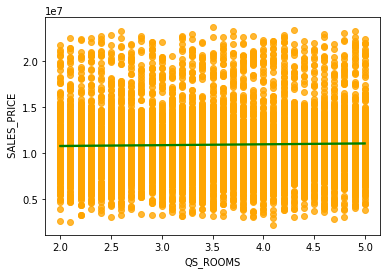

In [ ]:
sns.regplot(x="QS_ROOMS",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("QS_ROOMS")
plt.ylabel(" SALES_PRICE")
data[["QS_ROOMS","SALES_PRICE"]].corr()

Change in QS_ROOMS ---> No change in SALES_PRICE ,discard the feature

In [ ]:
data=data.drop("QS_ROOMS",axis=1)

Feature:QS_BEDROOMS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


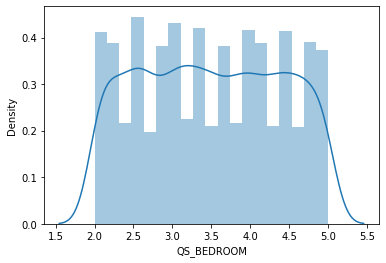

In [ ]:
sns.distplot(data["QS_BEDROOM"])

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


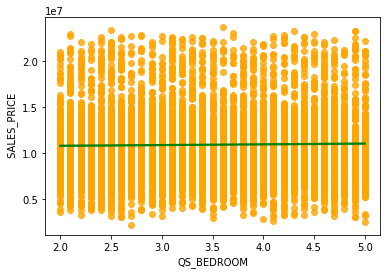

In [ ]:


sns.regplot(x="QS_BEDROOM",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("QS_BEDROOM")
plt.ylabel(" SALES_PRICE")
data[["QS_BEDROOM","SALES_PRICE"]].corr()

No change in SALES_PRICE due to change in QS_BEDROOM,discard the feature

In [ ]:
data=data.drop("QS_BEDROOM",axis=1)

Feature:QS_BATHROOM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


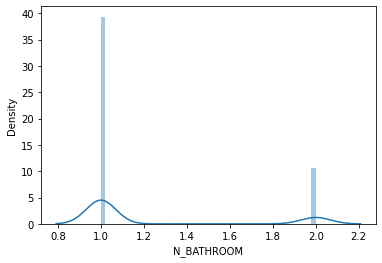

In [ ]:
sns.distplot(data["N_BATHROOM"])

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


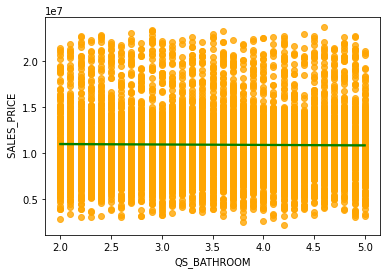

In [ ]:
sns.regplot(x="QS_BATHROOM",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("QS_BATHROOM")
plt.ylabel(" SALES_PRICE")
data[["QS_BATHROOM","SALES_PRICE"]].corr()

No change in SALES_PRICE due to change in QS_BATHROOM,discard the feature

In [ ]:
data=data.drop("QS_BATHROOM",axis=1)

Feature:QS_OVERALL

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


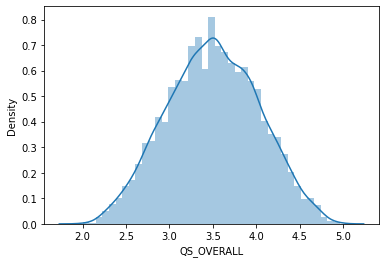

In [ ]:
sns.distplot(data["QS_OVERALL"])

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


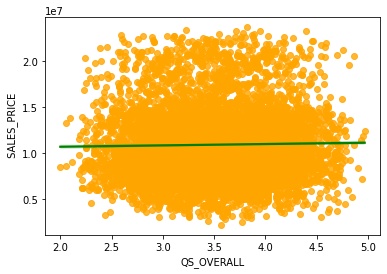

In [ ]:
sns.regplot(x="QS_OVERALL",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("QS_OVERALL")
plt.ylabel(" SALES_PRICE")
data[["QS_OVERALL","SALES_PRICE"]].corr()

No change in SALES_PRICE due to change in QS_OVERALL,discard the feature

In [ ]:
data=data.drop("QS_OVERALL",axis=1)

Feature:AGE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


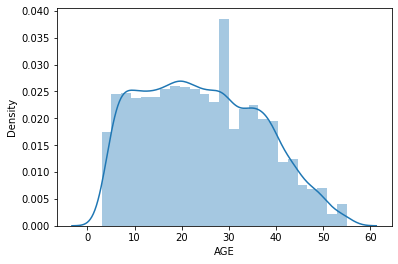

In [ ]:

sns.distplot(data["AGE"])

,AGE,SALES_PRICE
AGE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


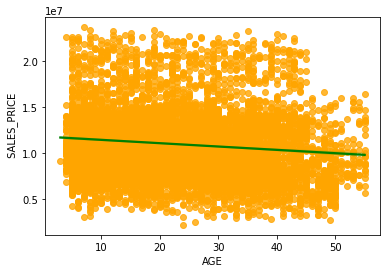

In [ ]:
sns.regplot(x="AGE",y="SALES_PRICE",data=data,scatter_kws={"color":"orange"},line_kws={"color":"green"})
plt.xlabel("AGE")
plt.ylabel(" SALES_PRICE")
data[["AGE","SALES_PRICE"]].corr()

IMPORTANT FEATURE,NO ENCODING REQUIRED

Categorical Features

Feature:AREA

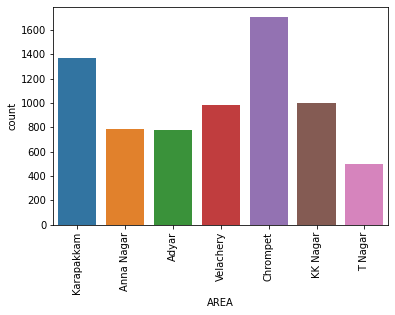

In [ ]:
sns.countplot(x="AREA",data=data)
plt.xticks(rotation="vertical")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

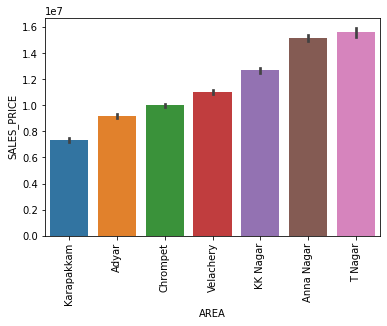

In [ ]:
sns.barplot(x=data["AREA"],y=data["SALES_PRICE"],order=data.groupby(by="AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
plt.xticks(rotation="vertical")

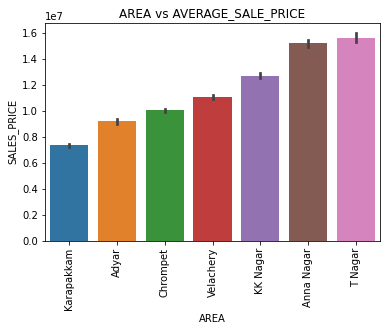

In [ ]:
sns.barplot(x='AREA',y='SALES_PRICE',order=data.groupby(by="AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"],data=data)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

Feature AREA has relation with SALES_PRICE, important feature,label encoding

Can be advised to construct in T Nagar followed by Anna Nagar,KK Nagar,Velanchery,Chorempet,Adyar,Karapakkam.

Feature:SALE_COND

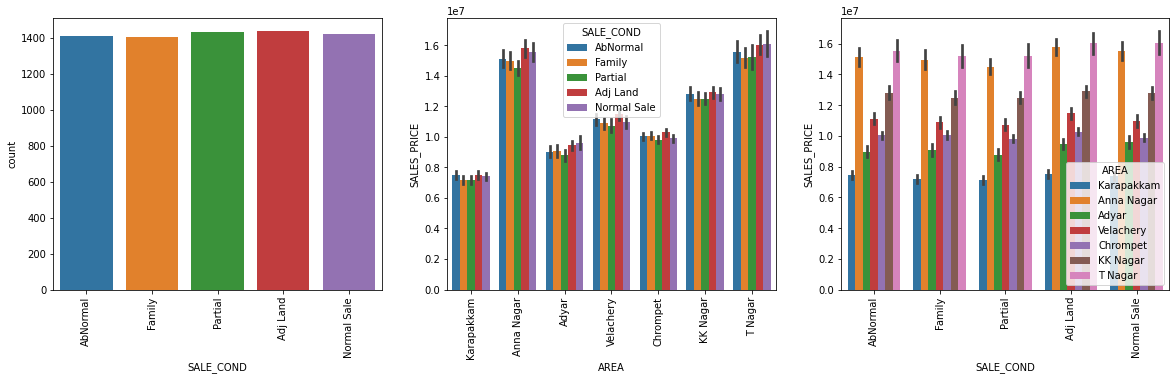

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="SALE_COND",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="AREA",y="SALES_PRICE",hue="SALE_COND",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="SALE_COND",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")

plt.show()

The sales price in all areas is all most similar for all SALE_COND 

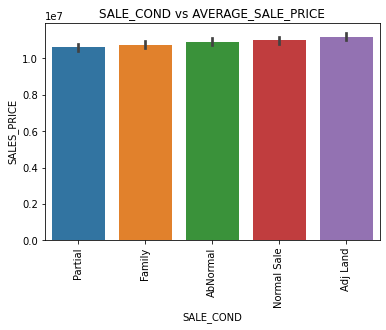

In [ ]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',order=data.groupby(by="SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"],data=data)
plt.title('SALE_COND vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

Considering the SALE_COND,Label Encoding

Feature:BUILDTYPE

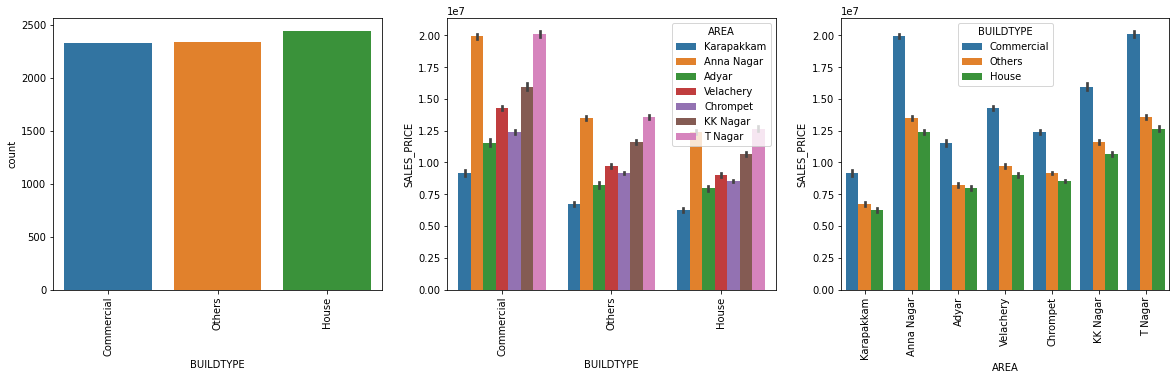

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="BUILDTYPE",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="AREA",y="SALES_PRICE",hue="BUILDTYPE",data=data)
plt.xticks(rotation="vertical")

plt.show()

In all areas Commercial houses are of more demand followed by house and others

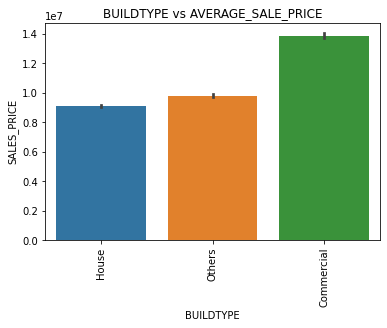

In [ ]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',order=data.groupby(by="BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"],data=data)
plt.title('BUILDTYPE vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

Considering the mean values of the feature BUILDTYPE ,the feature does not have linear relation with the target variable,so
we can perform one_hot_encoding

Feature:PARK_FACIL

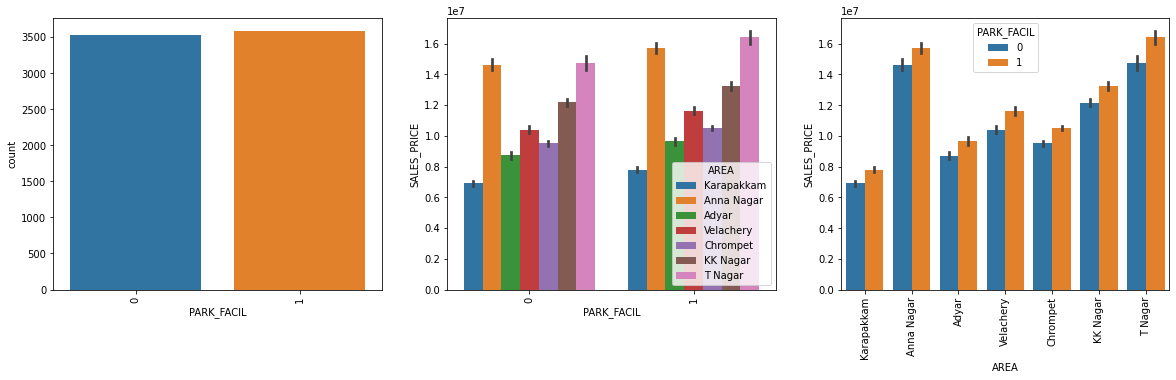

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="PARK_FACIL",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="PARK_FACIL",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="AREA",y="SALES_PRICE",hue="PARK_FACIL",data=data)
plt.xticks(rotation="vertical")
plt.show()

Constructions with parking facility are prefered widely

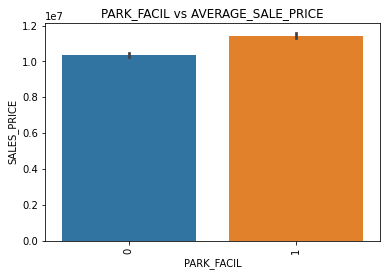

In [ ]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',order=data.groupby(by="PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"],data=data)
plt.title('PARK_FACIL vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

IMPORTANT FEATURE NO ENCODING REQUIRED

Feature:UTILITY_AVAIL

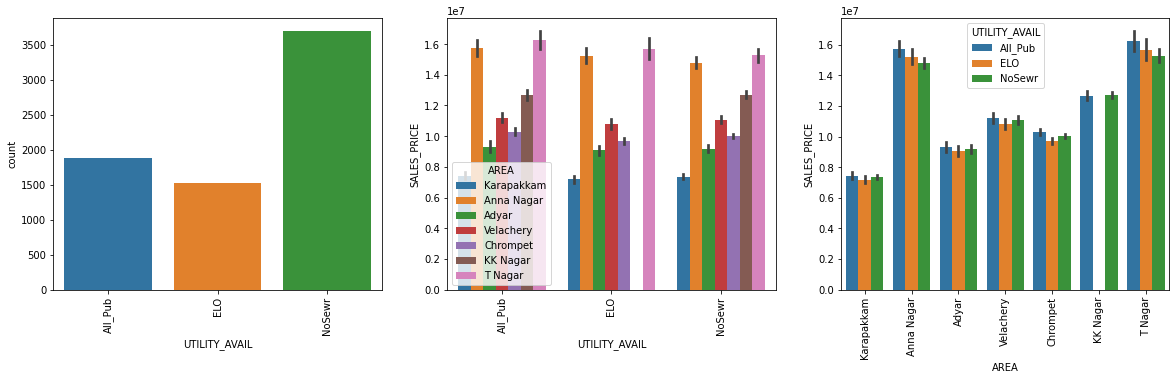

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="UTILITY_AVAIL",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="AREA",y="SALES_PRICE",hue="UTILITY_AVAIL",data=data)
plt.xticks(rotation="vertical")

plt.show()

Constructions with All_pub facilities are prefered followed by ELO 

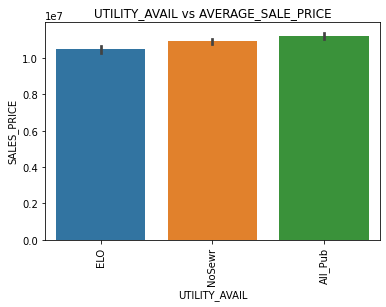

In [ ]:

sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',order=data.groupby(by="UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"],data=data)
plt.title('UTILITY_AVAIL vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

The mean value of the feature UTILITY_AVAIL has a linear relation with the target,we can perform Label encoding

Feature:STREET

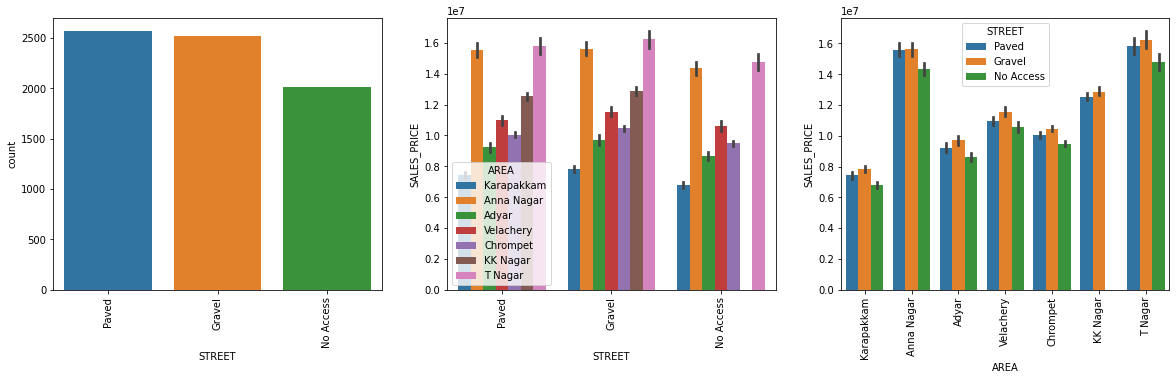

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="STREET",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="STREET",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="AREA",y="SALES_PRICE",hue="STREET",data=data)
plt.xticks(rotation="vertical")

plt.show()

Gravel and Paved streets are prefered widely

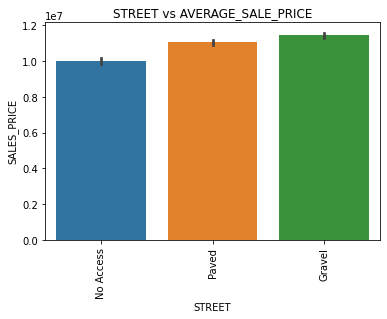

In [ ]:
sns.barplot(x='STREET',y='SALES_PRICE',order=data.groupby(by="STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"],data=data)
plt.title('STREET vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

The feature STREET has a linear relation with the target,we can perform label Encoding

Feature:MZZONE

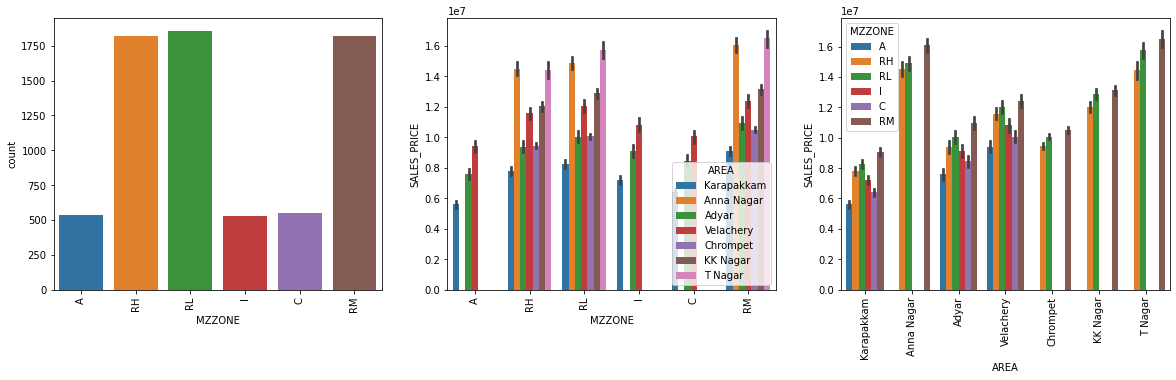

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="MZZONE",data=data)
plt.xticks(rotation="vertical")
plt.subplot(132)
sns.barplot(x="MZZONE",y="SALES_PRICE",hue="AREA",data=data)
plt.xticks(rotation="vertical")
plt.subplot(133)
sns.barplot(x="AREA",y="SALES_PRICE",hue="MZZONE",data=data)
plt.xticks(rotation="vertical")
plt.show()

It is preferable to construct in RM followed RL followed by RH



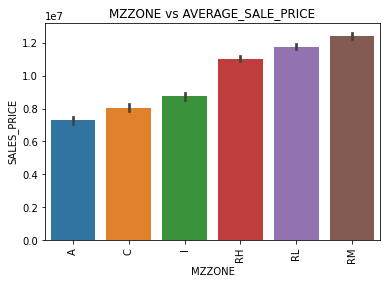

In [ ]:
sns.barplot(x='MZZONE',y='SALES_PRICE',order=data.groupby(by="MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"],data=data)
plt.title('MZZONE vs AVERAGE_SALE_PRICE')
plt.xticks(rotation="vertical")

plt.show()

The feature MZZONE has linear relation with the target so we can perform label encoding

**ENCODING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AREA               7109 non-null   object
 1   INT_SQFT           7109 non-null   int64 
 2   N_BEDROOM          7109 non-null   int64 
 3   N_BATHROOM         7109 non-null   int64 
 4   N_ROOM             7109 non-null   int64 
 5   SALE_COND          7109 non-null   object
 6   PARK_FACIL         7109 non-null   int64 
 7   BUILDTYPE          7109 non-null   object
 8   UTILITY_AVAIL      7109 non-null   object
 9   STREET             7109 non-null   object
 10  MZZONE             7109 non-null   object
 11  SALES_PRICE        7109 non-null   int64 
 12  CONSTRUCTION_YEAR  7109 non-null   int64 
 13  SALE_YEAR          7109 non-null   int64 
 14  AGE                7109 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 833.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data["AREA"]= data["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [ ]:
data["SALE_COND"]= data["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'Adj Land':5})

In [ ]:
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].map({"ELO":1,"NoSewr":2,"All_Pub":3})

In [ ]:
data["STREET"]=data["STREET"].map({"No Access":1,"Paved":2,"Gravel":3})

In [ ]:
data["MZZONE"]= data["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

In [ ]:
dummies = pd.get_dummies(data["BUILDTYPE"])
data= pd.concat([data,dummies], axis=1)
data = data.drop('BUILDTYPE',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AREA               7109 non-null   int64
 1   INT_SQFT           7109 non-null   int64
 2   N_BEDROOM          7109 non-null   int64
 3   N_BATHROOM         7109 non-null   int64
 4   N_ROOM             7109 non-null   int64
 5   SALE_COND          7109 non-null   int64
 6   PARK_FACIL         7109 non-null   int64
 7   UTILITY_AVAIL      7109 non-null   int64
 8   STREET             7109 non-null   int64
 9   MZZONE             7109 non-null   int64
 10  SALES_PRICE        7109 non-null   int64
 11  CONSTRUCTION_YEAR  7109 non-null   int64
 12  SALE_YEAR          7109 non-null   int64
 13  AGE                7109 non-null   int64
 14  Commercial         7109 non-null   uint8
 15  House              7109 non-null   uint8
 16  Others             7109 non-null   uint8
dtypes: int64(14), 

In [ ]:
data_corr=data.corr()

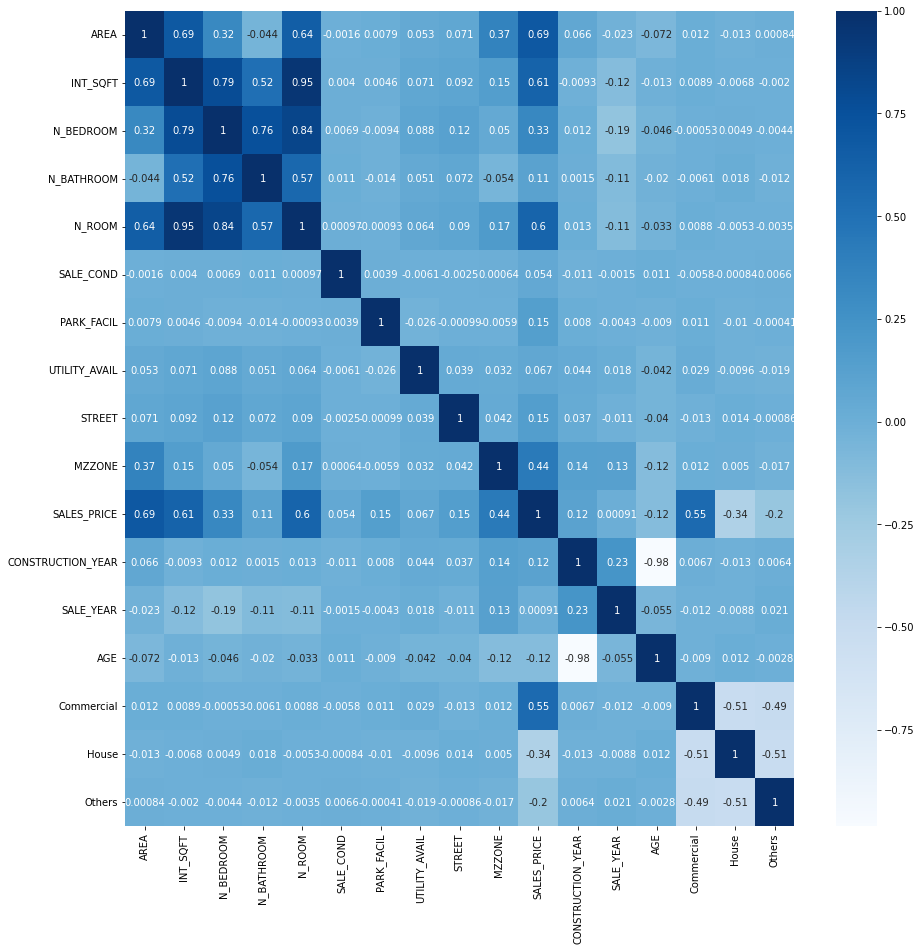

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data_corr,annot=True,cmap="Blues")

In [ ]:
x = data.drop('SALES_PRICE',axis = 1) # Feature variables
y = data['SALES_PRICE']               # Target variable

# Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [ ]:
x_test1=x_test
x_test1

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,CONSTRUCTION_YEAR,SALE_YEAR,AGE,Commercial,House,Others
3913,3,1029,1,1,3,4,1,1,3,6,1979,2008,29,1,0,0
2726,5,2006,3,2,5,5,1,3,2,6,2004,2010,6,0,0,1
6220,7,1579,1,1,4,2,1,3,3,6,1968,2011,43,1,0,0
2716,1,718,1,1,2,5,1,2,1,2,1985,2010,25,0,0,1
5459,3,1216,2,1,4,2,0,1,3,6,1977,2012,35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,2,691,1,1,2,4,1,1,3,3,1982,2009,27,1,0,0
3010,1,1220,1,1,3,3,1,2,1,1,2001,2011,10,0,0,1
66,4,1579,2,1,4,3,1,1,2,3,1987,2011,24,1,0,0
1642,6,1650,1,1,4,3,0,2,1,5,1981,2010,29,1,0,0


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

# Model fitting

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() # linera regression will use MSE for calculation
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
y_pred

array([14202727.00802855, 13490181.19178733, 18524912.59536894, ...,
       13661204.00340494, 15882190.22600061,  8125207.18234714])

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9244258686209539

# **KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import roc_auc_score,r2_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsRegressor(i) #initialize the model with 3 assumption
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print("k_value : ",i,"score: ",knn.score(x_test,y_test),"r2_score :",r2_score(y_test,y_pred))

k_value :  1 score:  0.903083530690193 r2_score : 0.903083530690193
k_value :  2 score:  0.9308039051909858 r2_score : 0.9308039051909858
k_value :  3 score:  0.9375180744076685 r2_score : 0.9375180744076685
k_value :  4 score:  0.9390727736789722 r2_score : 0.9390727736789722
k_value :  5 score:  0.9405628095858294 r2_score : 0.9405628095858294
k_value :  6 score:  0.9385466670799264 r2_score : 0.9385466670799264
k_value :  7 score:  0.9392694421097515 r2_score : 0.9392694421097515
k_value :  8 score:  0.9387999341195526 r2_score : 0.9387999341195526
k_value :  9 score:  0.93922988439536 r2_score : 0.93922988439536
k_value :  10 score:  0.9379890249597758 r2_score : 0.9379890249597758
k_value :  20 score:  0.9302152129034529 r2_score : 0.9302152129034529
k_value :  50 score:  0.9116726113553477 r2_score : 0.9116726113553477


In [ ]:
knn=KNeighborsRegressor(5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
r2_score(y_test,y_pred)

0.9405628095858294

 **KNN Regression with Cross_Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsRegressor(i) #initialize the model with 3 assumption
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  #print("k_value : ",i,"score: ",knn.score(x_test,y_test),"r2_score :",r2_score(y_test,y_pred))
  knn_val=KNeighborsClassifier(n_neighbors=i)
  knn_val.fit(x_train,y_train)
  print("k_value : ",i,"r2_score :",r2_score(y_test,y_pred),"val_accuracy : ",np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
  #print("Train_accuracy : ",knn_val.score(x,y))
  #print("val_accuracy : ",np.mean(cross_val_score(knn_val,x,y,cv=10)))
  #r2_score(y_test,y_pred)==knn.score(x_test,y_test)

k_value :  1 r2_score : 0.903083530690193 val_accuracy :  0.905793123285887
k_value :  2 r2_score : 0.9308039051909858 val_accuracy :  0.9276374714779566
k_value :  3 r2_score : 0.9375180744076685 val_accuracy :  0.9354863376920355
k_value :  4 r2_score : 0.9390727736789722 val_accuracy :  0.9377376891957011
k_value :  5 r2_score : 0.9405628095858294 val_accuracy :  0.9372949277392802
k_value :  6 r2_score : 0.9385466670799264 val_accuracy :  0.9366984727633818
k_value :  7 r2_score : 0.9392694421097515 val_accuracy :  0.9355371928238385
k_value :  8 r2_score : 0.9387999341195526 val_accuracy :  0.9345288049469224
k_value :  9 r2_score : 0.93922988439536 val_accuracy :  0.9337072046185593
k_value :  10 r2_score : 0.9379890249597758 val_accuracy :  0.932804341766545
k_value :  20 r2_score : 0.9302152129034529 val_accuracy :  0.924091984630587
k_value :  50 r2_score : 0.9116726113553477 val_accuracy :  0.9033679580701156


# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
y_pred

array([13840875., 12459280., 19627640., ..., 14086140., 18132160.,
        8410150.])

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9719155047539583

In [ ]:
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,r2_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,80]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train,y_train)

  y_pred_train=dt.predict(x_train)
  r2_score_train=r2_score(y_pred_train,y_train)

  y_pred_test=dt.predict(x_test)
  r2_score_test=r2_score(y_pred_test,y_test)
  #train_accuracy=r2_score(y_train,dt.predict(x_train))
  #dt=DecisionTreeRegressor(max_depth=depth)
  #val_accuracy=cross_val_score(dt,x_train,y_train,cv=10)
  print("depth:",depth,"test_score:",r2_score_train,"test_score:",r2_score_test)

depth: 1 test_score: -0.7513642327332253 test_score: -0.6993317720303196
depth: 2 test_score: 0.5330361071995585 test_score: 0.5481480757020796
depth: 3 test_score: 0.7570841918085288 test_score: 0.7519800103779255
depth: 4 test_score: 0.8731144631981586 test_score: 0.8656788447681831
depth: 5 test_score: 0.9158361399421402 test_score: 0.9078274991394699
depth: 6 test_score: 0.9410461684542362 test_score: 0.9343000637653293
depth: 7 test_score: 0.9582742502378413 test_score: 0.9464011797992415
depth: 8 test_score: 0.9720363037592911 test_score: 0.9599204989017982
depth: 9 test_score: 0.982272331536005 test_score: 0.9658494248971452
depth: 10 test_score: 0.9894691165721017 test_score: 0.9689748684468849
depth: 20 test_score: 0.9999996074152928 test_score: 0.9718702484048279
depth: 40 test_score: 1.0 test_score: 0.9711466679783038
depth: 60 test_score: 1.0 test_score: 0.9717239319387273
depth: 80 test_score: 1.0 test_score: 0.9714139919647665


In [ ]:
dt=DecisionTreeRegressor(max_depth=40)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

metrics.r2_score(y_test,y_pred)

0.9718800329710913

**Decision Tree Regression with cross validation** 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer 

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,80,100]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train,y_train)
  train_accuracy=r2_score(y_train,dt.predict(x_train))
  dt=DecisionTreeRegressor(max_depth=depth)
  val_accuracy=cross_val_score(dt,x_train,y_train,cv=10)
  print("depth:",depth,"r2_score:",train_accuracy,"test_score:",np.mean(val_accuracy))

depth: 1 r2_score: 0.36345605867188013 test_score: 0.36162036447194124
depth: 2 r2_score: 0.6816800365079163 test_score: 0.6805303832546072
depth: 3 r2_score: 0.8045597243268386 test_score: 0.8031246307797796
depth: 4 r2_score: 0.8874015748201463 test_score: 0.8828961946559559
depth: 5 r2_score: 0.922369797446146 test_score: 0.9150423044010585
depth: 6 r2_score: 0.944328232459664 test_score: 0.9359833250995797
depth: 7 r2_score: 0.9599455521074666 test_score: 0.9504858414413171
depth: 8 r2_score: 0.9727970001830094 test_score: 0.959041006483434
depth: 9 r2_score: 0.982581127532132 test_score: 0.9654537497601593
depth: 10 r2_score: 0.9895788603786401 test_score: 0.9682381941565976
depth: 20 r2_score: 0.999999607415447 test_score: 0.9711009389288355
depth: 40 r2_score: 1.0 test_score: 0.970877092429539
depth: 60 r2_score: 1.0 test_score: 0.9703524408943777
depth: 80 r2_score: 1.0 test_score: 0.9710008914970605
depth: 100 r2_score: 1.0 test_score: 0.9709375775570853


In [ ]:
dt=DecisionTreeRegressor(max_depth=40)

dt.fit(x_train,y_train)

important=dt.feature_importances_

list(zip(important,x_test1.columns))

[(0.48651488701616175, 'AREA'),
 (0.11364240888728545, 'INT_SQFT'),
 (5.967977375491279e-05, 'N_BEDROOM'),
 (0.0007935790203874367, 'N_BATHROOM'),
 (0.00016754670805404354, 'N_ROOM'),
 (0.00228154943024996, 'SALE_COND'),
 (0.01528042872930094, 'PARK_FACIL'),
 (0.0008612141771349774, 'UTILITY_AVAIL'),
 (0.011275036759206908, 'STREET'),
 (0.03866820559096241, 'MZZONE'),
 (0.00236162318986255, 'CONSTRUCTION_YEAR'),
 (0.0013973733339503478, 'SALE_YEAR'),
 (0.0033135342671838284, 'AGE'),
 (0.3182239778361388, 'Commercial'),
 (0.0021146286134026576, 'House'),
 (0.003044326666962962, 'Others')]

# **Random Forest**

In [ ]:
rows,columns=x_train.shape
depth=np.log2(columns)
depth

4.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
for trees in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
 rf=RandomForestRegressor(n_estimators=trees,max_depth=depth,max_features="sqrt",random_state=2)

 rf.fit(x_train,y_train)

 y_pred=rf.predict(x_test)



 print("trees:",trees,"r2_score:",r2_score(y_pred,y_test)) 


trees: 1 r2_score: 0.6608532622525738
trees: 2 r2_score: 0.7631721975776232
trees: 3 r2_score: 0.7853409345102491
trees: 4 r2_score: 0.814915588925845
trees: 5 r2_score: 0.769256486553306
trees: 6 r2_score: 0.7514554827781376
trees: 7 r2_score: 0.7257380765230851
trees: 8 r2_score: 0.7398927958966854
trees: 9 r2_score: 0.7398550658248364
trees: 10 r2_score: 0.7340964745022945
trees: 20 r2_score: 0.7596547137173613
trees: 40 r2_score: 0.745136901024676
trees: 60 r2_score: 0.7420796981920404
trees: 70 r2_score: 0.7525147242451973
trees: 100 r2_score: 0.7569825726038275
trees: 150 r2_score: 0.7669265597860366


In [ ]:

rf=RandomForestRegressor(n_estimators=4,max_depth=depth,max_features="sqrt",random_state=2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("trees:4","r2_score:",r2_score(y_pred,y_test)) 


trees:4 r2_score: 0.814915588925845


# **XGBoosting**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0) #initialising the values
  model.fit(x_train,y_train)
  r2_score=model.score(x_test,y_test)
  print("Learning_rate:",lr,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,x_train,y_train)))

Learning_rate: 0.01 r2_score: -0.40411510282864693 Cross_val_score -0.38131030241954267
Learning_rate: 0.02 r2_score: 0.7463416238989984 Cross_val_score 0.7433767229761639
Learning_rate: 0.03 r2_score: 0.9270067255166086 Cross_val_score 0.9222868539179773
Learning_rate: 0.04 r2_score: 0.9638333600239664 Cross_val_score 0.9600305326613423
Learning_rate: 0.05 r2_score: 0.9756662034679854 Cross_val_score 0.9726762646043683
Learning_rate: 0.1 r2_score: 0.9923445232374832 Cross_val_score 0.9905993187745661
Learning_rate: 0.11 r2_score: 0.9934751000479478 Cross_val_score 0.9920638831533332
Learning_rate: 0.12 r2_score: 0.9937253707240734 Cross_val_score 0.9931005231870298
Learning_rate: 0.13 r2_score: 0.9942984837889689 Cross_val_score 0.9934723617068574
Learning_rate: 0.14 r2_score: 0.9949426342337042 Cross_val_score 0.994300164935226
Learning_rate: 0.15 r2_score: 0.9955444338520264 Cross_val_score 0.9944426957126467
Learning_rate: 0.2 r2_score: 0.9960404569921277 Cross_val_score 0.99543363

In [ ]:
for n in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150,170]:
  model=xgb.XGBRegressor(learning_rate=0.7,n_estimators=n,verbosity=0) #initialising the values
  model.fit(x_train,y_train)
  r2_score=model.score(x_test,y_test)
  print("Number of trees:",n,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,x_train,y_train)))

Number of trees: 1 r2_score: -0.049307891954008864 Cross_val_score -0.027225354575457696
Number of trees: 2 r2_score: 0.8085066271137258 Cross_val_score 0.808663871658354
Number of trees: 3 r2_score: 0.9161228037570665 Cross_val_score 0.9172910417350201
Number of trees: 4 r2_score: 0.9408578565557605 Cross_val_score 0.9427928849239393
Number of trees: 5 r2_score: 0.9499790373214039 Cross_val_score 0.9523904370289639
Number of trees: 6 r2_score: 0.9568525670076118 Cross_val_score 0.9610557536418917
Number of trees: 7 r2_score: 0.9644137695253738 Cross_val_score 0.9682687040034266
Number of trees: 8 r2_score: 0.9702424560984535 Cross_val_score 0.9733592450076625
Number of trees: 9 r2_score: 0.9741712152669995 Cross_val_score 0.9769798895851493
Number of trees: 10 r2_score: 0.9770584976748343 Cross_val_score 0.9790932170317858
Number of trees: 20 r2_score: 0.9896840071065585 Cross_val_score 0.9890674144427622
Number of trees: 40 r2_score: 0.9944216910922864 Cross_val_score 0.9939578627517

In [ ]:
model=xgb.XGBRegressor(learning_rate=0.7,n_estimators=170,verbosity=0) #initialising the values 
model.fit(x_train,y_train)
r2_score=model.score(x_test,y_test)
print("Number of trees:",n,"r2_score:",r2_score,"Cross_val_score",np.mean(cross_val_score(model,x_train,y_train)))

Number of trees: 170 r2_score: 0.9980915771731655 Cross_val_score 0.9975113412334679


 **r2_score**


1. **Linear Regression   -------------->       0.9244258686209539**
2. **KNN Regression      ---------------->                 0.9405628095858294**
3. **DecisionTree Regression  ------>         0.9720868893520546**
4.  **Random Forest    ----------------->               0.814915588925845**
5.**XGBoosting Regression  ------->           0.9980915771731655**

**Best model is XGBoosting Regression**

**To the seller**

Profits can be increased by considering the following factors

1. Construct in T Nagar followed by Anna Nagar,KK Nagar,Velanchery,Chorempet,Adyar,Karapakkam.

2. In all the areas except KK Nagar and Valachery 2 Bedroom houses are of more demand followed by single bedroom.

3. 2 BathRoom houses are of more demand but in Anna Nagar and T Nagar 1 BathRoom house are of more demand.

4. In all the areas 4 room house has demand followed by 5,3 room house

5. In all areas Commercial houses are of more demand followed by house and others

6. Constructions with parking facility are prefered widely

7. Constructions with All_pub facilities are prefered followed by ELO 

8. Gravel and Paved streets are prefered widely

9. It is preferable to construct in RM followed RL followed by RH


**To the Customer**

 Questions to the customer:

  1. Which type of property is required ?

  2. What is the range of price affordabel by the customer?
  3. Is parking required or not?
  4. What is the expected SQFT of the property ,how many rooms and bathrooms are required? etc 

  Based on the answers for these types of questions the fair price of the property can be estimated.


